# Approximate Pi with sampling

In [1]:
import numpy as np
from matplotlib import pyplot as plt


The idea here is to empirically estimate the area of a circle by exploiting the fact that we can easily determine if a point is *inside* the circle by using the relationship $$ (x^2 + y^2) = r $$

We know that pi is equal to the area of a unit circle:
$$ A = πr^2 $$ so  $$pi = A/r^2 $$
so if $$ r = 1 $$
then $$ pi = A $$

To estimate the area of the circle we sample from a bounding square (the area of which we can trivially calculate) and determine what proportion of our samples land inside the circle. The estimation of the area of the circle is the ratio of the proportion of samples inside the circle to the known area of the bounding square. 

The intuition is that if the sampling is totally uniform across the square, then the proportion of samples that will land in the circle will be governed by the proportion of the area of the circle to the square. 

In [24]:
square_min = -1
square_max = 1

#circumference = 2 * pi * r
#area = pi * r ** 2

def approximate_pi_with_sampling(n):
    xy = np.random.uniform(square_min, square_max, size=(2, n))

    in_circle = np.array([e[0]**2 + e[1]**2 < 1 for e in xy.T])

    plt.figure(figsize=(5, 5))
    plt.scatter(x=xy[0][~in_circle], y=xy[1][~in_circle], s=1, marker='.');
    plt.scatter(x=xy[0][in_circle], y=xy[1][in_circle], s=1, color='green', marker='.');
    in_ratio = sum(in_circle)/n
    square_area = (square_max - square_min) ** 2
    pi_approx = square_area * in_ratio
    err = np.math.pi - pi_approx
    plt.title(f'Pi ~ {pi_approx:0.8f} | Error: {err:0.8f} ({100*err/np.math.pi:0.2f}%)');

## Pi is 3.141592653589793

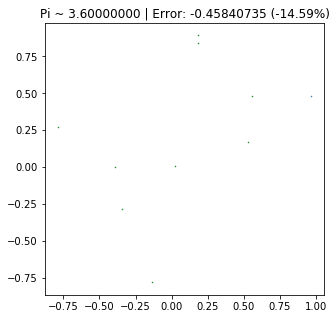

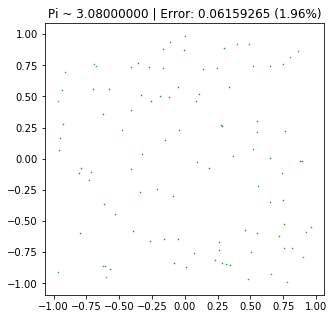

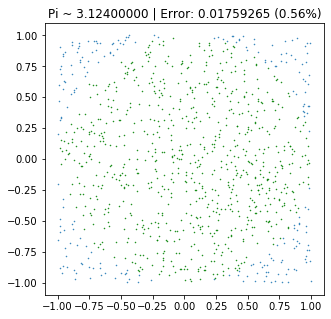

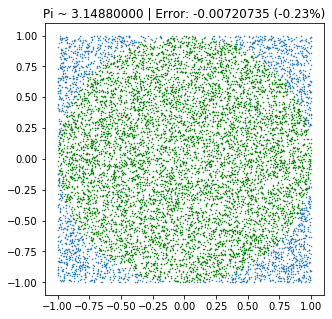

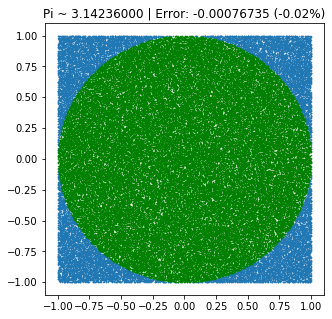

In [25]:
for _n in [10, 100, 1000, 10_000, 100_000]:
    approximate_pi_with_sampling(_n)